In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/sports-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sports-classification


In [4]:
# Завантаження необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Завантаження датасету
# Припускаємо, що датасет вже розпаковано в необхідній директорії
train_dir = '/kaggle/input/sports-classification/train'
valid_dir = '/kaggle/input/sports-classification/valid'

# Параметри генератора
img_height = 224
img_width = 224
batch_size = 32

In [6]:
# Використання ImageDataGenerator для підготовки даних
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [7]:
# Завантаження попередньо навченої моделі MobileNetV2 без верхнього шару
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Заморожування шару базової моделі
base_model.trainable = False

# Додавання власних шарів
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

I0000 00:00:1745268406.015175      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745268406.015919      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Створення моделі
model = Model(inputs=base_model.input, outputs=x)

# Компіляція моделі
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Використання EarlyStopping для зупинки навчання при відсутності поліпшення
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Навчання моделі
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator,
                    callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745268439.538770      90 service.cc:148] XLA service 0x7ac4fc1111a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745268439.539922      90 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745268439.539945      90 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745268440.512566      90 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/422 ━━━━━━━━━━━━━━━━━━━━ 2:06:19 18s/step - accuracy: 0.0000e+00 - loss: 5.1278

I0000 00:00:1745268445.122685      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 ━━━━━━━━━━━━━━━━━━━━ 261s 577ms/step - accuracy: 0.3914 - loss: 2.6211 - val_accuracy: 0.7800 - val_loss: 0.7158
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 177s 413ms/step - accuracy: 0.7068 - loss: 1.0093 - val_accuracy: 0.8140 - val_loss: 0.5982
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 175s 408ms/step - accuracy: 0.7665 - loss: 0.8159 - val_accuracy: 0.8440 - val_loss: 0.4993
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 176s 410ms/step - accuracy: 0.7855 - loss: 0.7231 - val_accuracy: 0.8540 - val_loss: 0.4912
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 178s 415ms/step - accuracy: 0.8124 - loss: 0.6347 - val_accuracy: 0.8460 - val_loss: 0.4866
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 176s 410ms/step - accuracy: 0.8160 - loss: 0.6087 - val_accuracy: 0.8500 - val_loss: 0.4864
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 176s 410ms/step - accuracy: 0.8347 - loss: 0.5421 - val_accuracy: 0.8580 - val_loss: 0.4480
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 176s 411ms/step - accuracy: 0.8342 - loss: 0.53

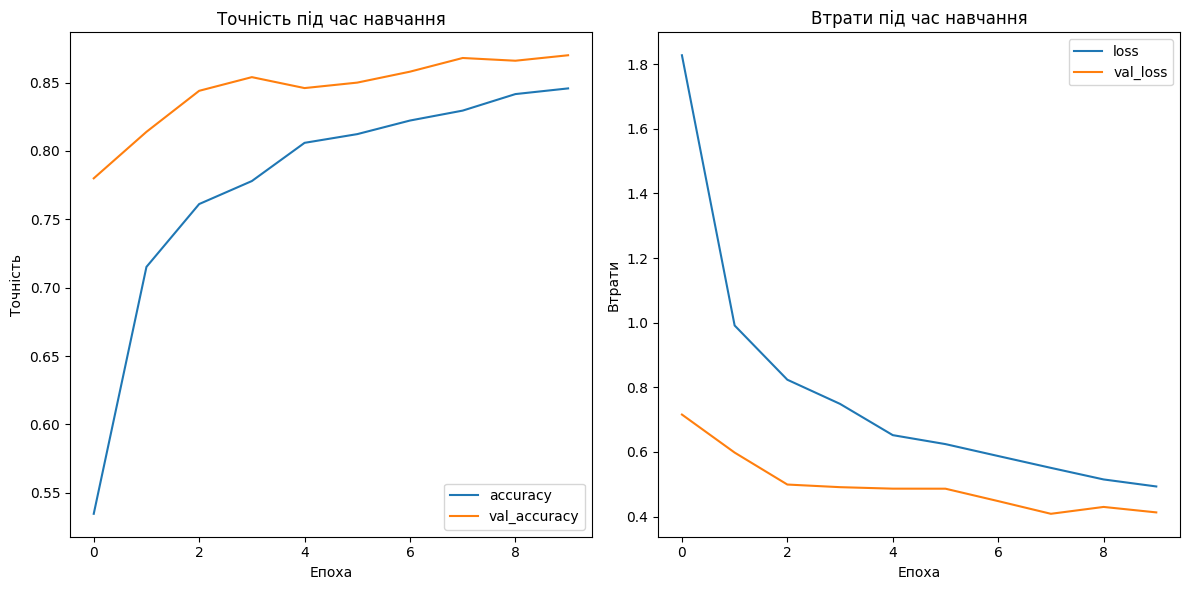

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8760 - loss: 0.3845
Валідаційна точність: 0.8700


In [9]:
# Виведення кривих навчання
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Точність під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Втрати під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Оцінка моделі на валідаційному наборі
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Валідаційна точність: {val_accuracy:.4f}')